<a href="https://colab.research.google.com/github/caiobaptistaa/Econometria-4_PUC-Rio/blob/main/Trabalho_1_Quest_2_RIDGE_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> C) AR + Ridge Regression <h2>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from math import log
from sklearn.preprocessing import StandardScaler

def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Trabalho-1/data.csv', sep= ",", low_memory= False)
CPI = pd.read_csv('/content/drive/MyDrive/Trabalho-1/CPI.csv', sep= ",", low_memory= False)

Mounted at /content/drive


In [ ]:
CPI.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff
0,1959-03-01,-0.001036,-0.000691
1,1959-04-01,0.000345,0.001381
2,1959-05-01,0.002066,0.001721
3,1959-06-01,0.002405,0.000339
4,1959-07-01,0.001372,-0.001032


In [ ]:
CPI.shape

(753, 3)

In [ ]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-02-01,0.003931,0.003613,0.010368,0.007310,0.019395,0.013404,0.008623,0.007310,0.005233,0.009513,0.013292,0.031178,0.045032,0.017354,0.018214,-0.002727,-0.013714,1.2455,-0.004234,-0.002885,-0.1,-0.8,-0.012788,-0.004286,-0.089097,-0.086094,-0.091328,-0.028293,0.003994,0.004989,-0.012419,-0.004353,0.007771,0.011264,0.002872,0.003438,0.003891,0.002605,0.005777,0.000827,0.001356,39.7,0.1,40.3,7.418781,5.846439,6.150603,6.230481,5.840642,0.045416,0.024493,0.000013,0.000015,0.004242,0.000195,0.000256,-3049.010875,4.064649e-08,0.000146,-0.015400,-0.016493,-0.05,-0.12,0.04,0.18,-0.05,-0.06,0.02,0.02,0.27,0.70,1.11,1.53,1.53,1.71,2.46,0.000255,0.0,0.000997,0.007930,0.000009,0.000000,0.000011,0.000040,0.000000,0.000000,0.000005,0.000012,0.000022,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000,8.734933e-07,3.359517e-07,1.547478e-07,0.000002,0.000022,0.000017,0.000024,0.000065
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,6.502958e-06,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,1.464372e-04,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,

In [ ]:
data.shape

(754, 104)

CPI series has already been differentiated.

In [ ]:
data = data.drop([0])

In [ ]:
data.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
1,1959-03-01,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,0.000007,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
2,1959-04-01,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,0.000146,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
3,1959-05-01,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.022349,0.000434,0.000128,0.014949,0.019023,-0.06,-0.11,0.06,0.24,0.23,0.19,0.14,0.10,-0.06,0.43,1.06,1.45,1.41,1.47,2.06,0.000046,0.0,-0.000710,-0.000623,0.000009,0.000009,0.000042,0.000040,0.000000,0.000037,0.000005,0.000000,0.000022,0.000009,0.000007,0.000019,0.000012,0.000000,0.000000,3.123134e-07,2.765394e-06,1.141107e-06,0.000002,0.000021,0.000016,0.000000,0.000176
4,1959-06-01,0.003102,0.002974,0.003708,0.009064,0.001144,0.007034,0.007126,-0.004768,0.007452,-0.007044,0.023273,-0.006575,-0.007350,-0.003002,0.001142,0.005308,0.000000,-0.1473,0.001466,0.002316,-0.1,0.2,0.028659,-0.042689,-0.002075,0.062132,-0.048095,0.044765,0.002443,0.004325,0.007018,0.004202,0.004317,0.005335,0.002841,0.001374,0.001734,0.002834,0.002105,0.002857,-0.001227,40.2,0.0,40.6,7.315218,5.537334,5.837730,6.249975,5.961005,0.045693,0.007621,0.000013,0.000042,0

In [ ]:
data = data.drop(columns = ["sasdate"]).reset_index(drop=True)

In [ ]:
data.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,0.000007,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
1,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,0.000146,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
2,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.022349,0.000434,0.000128,0.014949,0.019023,-0.06,-0.11,0.06,0.24,0.23,0.19,0.14,0.10,-0.06,0.43,1.06,1.45,1.41,1.47,2.06,0.000046,0.0,-0.000710,-0.000623,0.000009,0.000009,0.000042,0.000040,0.000000,0.000037,0.000005,0.000000,0.000022,0.000009,0.000007,0.000019,0.000012,0.000000,0.000000,3.123134e-07,2.765394e-06,1.141107e-06,0.000002,0.000021,0.000016,0.000000,0.000176
3,0.003102,0.002974,0.003708,0.009064,0.001144,0.007034,0.007126,-0.004768,0.007452,-0.007044,0.023273,-0.006575,-0.007350,-0.003002,0.001142,0.005308,0.000000,-0.1473,0.001466,0.002316,-0.1,0.2,0.028659,-0.042689,-0.002075,0.062132,-0.048095,0.044765,0.002443,0.004325,0.007018,0.004202,0.004317,0.005335,0.002841,0.001374,0.001734,0.002834,0.002105,0.002857,-0.001227,40.2,0.0,40.6,7.315218,5.537334,5.837730,6.249975,5.961005,0.045693,0.007621,0.000013,0.000042,0.004066,0.000016,0.000029,-0.005743,0.000516,0.00009

In [ ]:
CPI_data = CPI.merge(data, left_index = True, right_index = True, how = "left")

In [ ]:
CPI_data.head()

,sasdate,CPIAUCSL,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,1959-03-01,-0.001036,-0.000691,0.006430,0.007359,0.009410,0.008321,0.014303,0.006036,0.004899,0.000000,0.019397,-0.004745,0.010744,0.025639,0.038644,0.014912,0.015524,0.006802,0.024999,1.0341,0.006175,0.009113,-0.3,-0.2,-0.063081,-0.062936,-0.053893,-0.027909,-0.073688,-0.083287,0.006168,0.009431,-0.000142,0.011013,0.009482,0.014154,0.002864,0.004340,0.005256,0.003489,0.009304,0.004124,0.001969,40.0,0.2,40.4,7.390181,5.799093,6.023448,6.220590,5.924256,0.022166,0.024973,0.000005,0.000027,0.006230,0.000004,0.000117,-0.005645,0.000007,0.000059,0.025062,0.024722,0.37,0.10,0.00,0.07,0.03,0.03,-0.01,-0.04,0.00,0.33,0.81,1.19,1.19,1.33,2.05,0.002200,0.0,0.001210,-0.005142,0.000000,0.000009,0.000000,0.000010,0.000101,0.000150,0.000000,0.000046,0.000022,0.000009,0.000027,0.000000,0.000000,0.000000,0.000000,4.689852e-07,1.552290e-06,5.339021e-07,0.000003,0.000022,0.000017,0.000094,0.000522
1,1959-04-01,0.000345,0.001381,0.006494,0.007049,-0.003639,0.000616,0.021077,0.014338,0.014542,0.015653,0.006379,0.016511,0.025790,0.027244,0.029658,0.030501,0.021101,0.004054,-0.004499,1.5153,0.003973,0.007765,-0.4,-0.4,0.023706,-0.157205,-0.152362,-0.261610,-0.074787,-0.055003,0.005774,0.010434,0.001561,0.023615,0.008224,0.012416,0.002222,0.003147,0.002939,0.004825,-0.006687,0.003697,0.001229,40.2,0.1,40.5,7.371489,5.616771,5.968708,6.284134,5.961005,0.010990,0.016414,0.000000,0.000010,0.002701,0.000064,0.000262,0.027813,0.000146,0.000142,0.016599,0.018723,0.16,0.15,0.14,0.11,0.13,0.13,0.10,0.01,-0.01,0.31,0.76,1.16,1.16,1.27,1.90,-0.000046,0.0,0.001350,-0.006414,0.000000,0.000009,0.000000,0.000040,0.000000,0.000037,0.000005,0.000011,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,3.958331e-06,1.033545e-06,3.823042e-07,0.000012,0.000022,0.000066,0.000023,0.000004
2,1959-05-01,0.002066,0.001721,0.005763,0.006616,0.012005,0.007803,0.014950,0.008269,0.009583,0.004768,0.020151,0.000000,0.031893,0.025433,0.034046,0.008942,0.013828,0.014735,-0.019350,0.9237,-0.002359,-0.001066,-0.1,-0.2,-0.010091,0.073266,-0.073886,-0.045120,-0.092936,0.002185,0.004286,0.005641,0.006784,0.000648,0.006608,0.009102,0.003008,0.003518,0.004027,0.004035,0.011224,0.003275,0.001350,40.3,0.0,40.7,7.311886,5.560682,5.872118,6.188264,5.981414,-0.043038,-0.003043,0.000051,0.000052,0.005181,0.000000,0.000029,-0.022349,0.000434,0.000128,0.014949,0.019023,-0.06,-0.11,0.06,0.24,0.23,0.19,0.14,0.10,-0.06,0.43,1.06,1.45,1.41,1.47,2.06,0.000046,0.0,-0.000710,-0.000623,0.000009,0.000009,0.000042,0.000040,0.000000,0.000037,0.000005,0.000000,0.000022,0.000009,0.000007,0.000019,0.000012,0.000000,0.000000,3.123134e-07,2.765394e-06,1.141107e-06,0.000002,0.000021,0.000016,0.000000,0.000176
3,1959-06-01,0.002405,0.000339,0.003102,0.002974,0.003708,0.009064,0.001144,0.007034,0.007126,-0.004768,0.007452,-0.007044,0.023273,-0.006575,-0.007350,-0.003002,0.001142,0.005308,0.000000,-0.1473,0.001466,0.002316,-0.1,0.2,0.028659,-0.042689,-0.002075,0.062132,-0.048095,0.044765,0.002443,0.004325,0.007018,0.004202,0.004317,0.005335,0.002841,0.001374,0.001734,0.002834,0.002105,0.002857,-0.001227

In [ ]:
date = CPI_data["sasdate"]
date = pd.DataFrame(date)
date

,sasdate
0,1959-03-01
1,1959-04-01
2,1959-05-01
3,1959-06-01
4,1959-07-01
...,...
748,2021-07-01
749,2021-08-01
750,2021-09-01
751,2021-10-01


In [ ]:
CPI_data = CPI_data.drop(columns = ["sasdate", "CPIAUCSL"])

Let's check the variance distribution for each variable.

(array([3.30029875, 0.07174562, 0.17936406, 0.03587281, 0.        ,
        0.        , 0.03587281, 0.        , 0.        , 0.03587281,
        0.        , 0.        , 0.        , 0.03587281, 0.03587281]),
 array([3.56964391e-10, 2.68041003e-01, 5.36082005e-01, 8.04123008e-01,
        1.07216401e+00, 1.34020501e+00, 1.60824601e+00, 1.87628702e+00,
        2.14432802e+00, 2.41236902e+00, 2.68041002e+00, 2.94845103e+00,
        3.21649203e+00, 3.48453303e+00, 3.75257403e+00, 4.02061504e+00]),
 <a list of 15 Patch objects>)

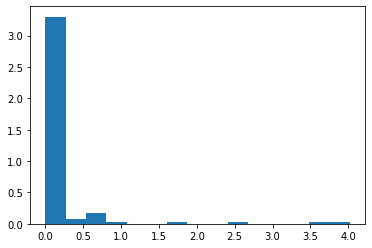

In [ ]:
plt.hist(CPI_data.var(), density = True, bins = 15)

We can see that variables have much different variances, so we need to standardize all variables.
Below is the distribution of standardized variables.

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]),
 array([0.5       , 0.56666667, 0.63333333, 0.7       , 0.76666667,
        0.83333333, 0.9       , 0.96666667, 1.03333333, 1.1       ,
        1.16666667, 1.23333333, 1.3       , 1.36666667, 1.43333333,
        1.5       ]),
 <a list of 15 Patch objects>)

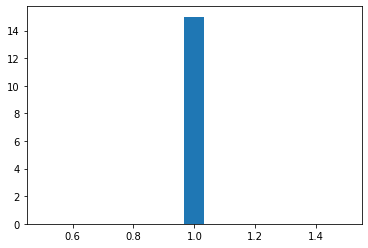

In [ ]:
CPI_data_st = StandardScaler().fit_transform(CPI_data)
plt.hist(CPI_data_st.var(), density = True, bins = 15)

In [ ]:
CPI_data_st = pd.DataFrame(CPI_data_st, columns = CPI_data.columns)
CPI_data_st.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST
0,-0.261529,0.312110,0.803350,0.795819,0.228191,1.210130,0.412662,0.265601,-0.145218,0.525993,-0.779380,0.430148,1.887337,1.933867,1.128868,1.164945,0.130201,1.120550,1.228248,1.614604,1.181953,-0.677139,-0.264007,-0.670702,-0.726541,-0.853746,-0.294690,-1.022079,-0.751020,0.789585,1.413821,0.003548,0.912492,1.578517,1.841802,0.712028,0.422389,0.744926,0.682954,1.135163,1.077979,0.182186,-0.442977,1.392428,-0.509105,0.544578,1.769129,1.139089,-0.639107,0.377948,0.455427,1.937625,-0.038066,-0.145444,0.621443,-0.141409,-0.083118,-0.005725,-0.185746,-0.180711,0.535144,0.513741,0.739854,0.248506,0.010353,0.182034,0.106848,0.121736,-0.036759,-0.179694,0.628439,0.841033,0.995964,0.352458,0.088226,-0.379016,-0.501056,0.173016,0.065802,0.102576,-0.409862,-0.441131,-0.352922,-0.339376,-0.330309,-0.196796,-0.343382,-0.326815,-0.150695,-0.134602,-0.248306,0.101499,-0.578458,-0.568133,-0.479522,-0.564115,-0.609173,-0.397242,-0.325584,-0.610056,0.021798,-0.265578,1.631675,1.840471
1,0.510751,0.317355,0.752749,-0.734327,-0.259412,1.877112,1.247416,1.153339,1.328667,0.125529,1.974089,1.293263,2.016167,1.450229,2.445681,1.647491,0.052140,-0.277187,1.796783,0.905837,0.981107,-0.904564,-0.506443,0.247445,-1.805214,-2.380661,-2.707726,-1.037030,-0.495301,0.724641,1.566060,0.096964,2.088155,1.374357,1.618179,0.570705,0.226562,0.313874,1.059758,-1.161266,0.885734,-0.024984,-0.135547,0.689210,-0.373835,0.483595,1.330499,1.007326,-0.426912,0.476741,0.178371,1.128928,-0.038150,-0.243564,-0.003199,-0.123899,-0.080452,0.027999,0.012978,0.444973,0.298761,0.346743,0.323449,0.368535,0.367014,0.279820,0.424231,0.488550,0.469854,0.057608,0.614122,0.814441,0.929822,0.329799,0.069403,-0.410547,-0.575913,0.081571,0.065802,0.109170,-0.504938,-0.441131,-0.352922,-0.339376,-0.320597,-0.199694,-0.398835,-0.260039,-0.217750,-0.827368,-0.343044,-0.257433,-0.069663,-0.234343,-0.479522,-0.564115,-0.441694,-0.415206,-0.326878,-0.120415,0.016012,0.214059,-0.006484,-0.558168
2,0.637677,0.257446,0.682365,1.100131,0.195424,1.273896,0.637199,0.696787,0.303771,0.549195,-0.164726,1.643371,1.870815,1.686400,0.624543,1.018181,0.355535,-0.980885,1.097811,-1.133016,-0.335154,-0.222290,-0.264007,-0.110102,0.831956,-1.163765,-0.472406,-1.283887,0.021732,0.479310,0.838088,0.383423,-0.054432,1.112241,1.192056,0.743625,0.287413,0.516247,0.837059,1.410951,0.695587,0.008910,0.018168,-0.014008,-0.103294,0.289139,1.195558,0.774829,-0.747055,0.531606,-1.160987,-0.709293,-0.037220,-0.004466,0.435843,-0.142584,-0.084742,-0.022562,0.420961,0.341106,0.252664,0.355104,-0.112785,-0.255615,0.163207,0.597625,0.741614,0.708639,0.654077,0.484752,0.542538,0.973992,1.326676,0.548838,0.226265,-0.305445,-0.496066,0.085338,0.065802,0.012503,-0.071818,-0.346009,-0.352922,-0.136152,-0.320597,-0.199694,-0.398835,-0.260337,-0.239802,-0.141076,-0.248306,-0.168401,-0.074050,-0.236637,-0.479522,-0.564115,-0.616693,-0.355231,-0.320401,-0.642659,0.010307,-0.268166,-0.542090,0.237093
3,0.122229,0.039392,0.089121,0.127246,0.275217,-0.085281,0.513046,0.470631,-0.594208,0.158522,-1.077136,1.148835,-0.697712,-0.541604,-0.384371,-0.07960

In [ ]:
CPI_data_st.shape

(753, 104)

In [ ]:
lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for col in CPI_data_st.columns:
  for i in lags:
    CPI_data_st[col + "_lag_" + str(i)] = CPI_data_st[col].shift(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [ ]:
CPI_data_st.head()

,CPIAUCSL_diff,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,RPI_lag_1,RPI_lag_2,RPI_lag_3,RPI_lag_4,RPI_lag_5,RPI_lag_6,RPI_lag_7,RPI_lag_8,RPI_lag_9,RPI_lag_10,RPI_lag_11,RPI_lag_12,W875RX1_lag_1,W875RX1_lag_2,W875RX1_lag_3,W875RX1_lag_4,W875RX1_lag_5,W875RX1_lag_6,W875RX1_lag_7,W875RX1_lag_8,W875RX1_lag_9,W875RX1_lag_10,W875RX1_lag_11,W875RX1_lag_12,DPCERA3M086SBEA_lag_1,DPCERA3M086SBEA_lag_2,DPCERA3M086SBEA_lag_3,DPCERA3M086SBEA_lag_4,DPCERA3M086SBEA_lag_5,DPCERA3M086SBEA_lag_6,DPCERA3M086SBEA_lag_7,DPCERA3M086SBEA_lag_8,DPCERA3M086SBEA_lag_9,DPCERA3M086SBEA_lag_10,DPCERA3M086SBEA_lag_11,DPCERA3M086SBEA_lag_12,RETAILx_lag_1,RETAILx_lag_2,RETAILx_lag_3,RETAILx_lag_4,RETAILx_lag_5,RETAILx_lag_6,RETAILx_lag_7,RETAILx_lag_8,RETAILx_lag_9,RETAILx_lag_10,RETAILx_lag_11,RETAILx_lag_12,INDPRO_lag_1,INDPRO_lag_2,INDPRO_lag_3,INDPRO_lag_4,INDPRO_lag_5,INDPRO_lag_6,INDPRO_lag_7,INDPRO_lag_8,INDPRO_lag_9,INDPRO_lag_10,INDPRO_lag_11,INDPRO_lag_12,IPFPNSS_lag_1,IPFPNSS_lag_2,IPFPNSS_lag_3,IPFPNSS_lag_4,IPFPNSS_lag_5,IPFPNSS_lag_6,IPFPNSS_lag_7,IPFPNSS_lag_8,IPFPNSS_lag_9,IPFPNSS_lag_10,IPFPNSS_lag_11,IPFPNSS_lag_12,IPFINAL_lag_1,IPFINAL_lag_2,IPFINAL_lag_3,IPFINAL_lag_4,IPFINAL_lag_5,IPFINAL_lag_6,IPFINAL_lag_7,IPFINAL_lag_8,IPFINAL_lag_9,IPFINAL_lag_10,IPFINAL_lag_11,IPFINAL_lag_12,IPCONGD_lag_1,IPCONGD_lag_2,IPCONGD_lag_3,IPCONGD_lag_4,IPCONGD_lag_5,IPCONGD_lag_6,IPCONGD_lag_7,IPCONGD_lag_8,IPCONGD_lag_9,IPCONGD_lag_10,IPCONGD_lag_11,IPCONGD_lag_12,IPDCONGD_lag_1,IPDCONGD_lag_2,IPDCONGD_lag_3,IPDCONGD_lag_4,IPDCONGD_lag_5,IPDCONGD_lag_6,IPDCONGD_lag_7,IPDCONGD_lag_8,IPDCONGD_lag_9,IPDCONGD_lag_10,IPDCONGD_lag_11,IPDCONGD_lag_12,IPNCONGD_lag_1,IPNCONGD_lag_2,IPNCONGD_lag_3,IPNCONGD_lag_4,IPNCONGD_lag_5,IPNCONGD_lag_6,IPNCONGD_lag_7,IPNCONGD_lag_8,IPNCONGD_lag_9,IPNCONGD_lag_10,IPNCONGD_lag_11,IPNCONGD_lag_12,IPBUSEQ_lag_1,IPBUSEQ_lag_2,IPBUSEQ_lag_3,IPBUSEQ_lag_4,IPBUSEQ_lag_5,IPBUSEQ_lag_6,IPBUSEQ_lag_7,IPBUSEQ_lag_8,IPBUSEQ_lag_9,IPBUSEQ_lag_10,IPBUSEQ_lag_11,IPBUSEQ_lag_12,IPMAT_lag_1,IPMAT_lag_2,IPMAT_lag_3,IPMAT_lag_4,IPMAT_lag_5,IPMAT_lag_6,IPMAT_lag_7,IPMAT_lag_8,IPMAT_lag_9,IPMAT_lag_10,IPMAT_lag_11,IPMAT_lag_12,IPDMAT_lag_1,IPDMAT_lag_2,IPDMAT_lag_3,IPDMAT_lag_4,IPDMAT_lag_5,IPDMAT_lag_6,IPDMAT_lag_7,IPDMAT_lag_8,IPDMAT_lag_9,IPDMAT_lag_10,IPDMAT_lag_11,IPDMAT_lag_12,IPNMAT_lag_1,IPNMAT_lag_2,IPNMAT_lag_3,IPNMAT_lag_4,IPNMAT_lag_5,IPNMAT_lag_6,IPNMAT_lag_7,IPNMAT_lag_8,IPNMAT_lag_9,IPNMAT_lag_10,IPNMAT_lag_11,IPNMAT_lag_12,IPMANSICS_lag_1,IPMANSICS_lag_2,IPMANSICS_lag_3,IPMANSICS_lag_4,IPMANSICS_lag_5,IPMANSICS_lag_6,IPMANSICS_lag_7,IPMANSICS_lag_8,IPMANSICS_lag_9,IPMANSICS_lag_10,IPMANSICS_lag_11,IPMANSICS_lag_12,IPB51222S_lag_1,IPB51222S_lag_2,IPB51222S_lag_3,IPB51222S_lag_4,IPB51222S_lag_5,IPB51222S_lag_6,IPB51222S_lag_7,IPB51222S_lag_8,IPB51222S_lag_9,IPB51222S_lag_10,IPB51222S_lag_11,IPB51222S_lag_12,IPFUELS_lag_1,IPFUELS_lag_2,IPFUELS_lag_3,IPFUELS_lag_4,IPFUEL

In [ ]:
CPI_data_st.shape

(753, 1352)

In [ ]:
CPI_data_st = CPI_data_st.dropna()
CPI_data_st.head()

CPIAUCSL_diff       RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO  \
12      -0.511091 -0.058435 -0.246025         1.338814 -0.368108 -1.085716   
13       1.636798  0.065315  0.193351         1.492932  1.340792 -0.981835   
14      -1.266534 -0.018131  0.002729        -2.692968 -1.250538 -0.310321   
15       0.121407 -0.150242 -0.435611        -0.333351 -0.384707 -1.443471   
16      -1.264700 -0.064974 -0.085544        -0.069360 -0.937432 -0.540156   

     IPFPNSS   IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT  \
12 -0.538628 -0.291251 -0.036784 -0.684932  1.020984 -0.063047 -1.498296   
13  0.035444 -0.079598  0.502501 -0.107258  1.156111 -0.803954 -2.066718   
14  0.378117  0.446611  0.391395  0.220323  0.272897 -0.000289 -0.904490   
15 -1.341900 -1.241112 -0.789523 -0.398201 -0.894599 -0.934711 -1.472083   
16 -0.773234 -0.718231 -1.010926 -1.264241  0.127525 -0.880702 -0.076205   

      IPDMAT    IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV  \
12 -1.873356 -0.093662  -1.248569   0.997029  0.422500 -1.610648 -2.952314   
13 -2.112151 -0.873854  -0.866170  -0.028343  1.366369 -1.154709  5.133913   
14 -0.879093  0.001027  -0.673260  -0.411659 -1.386941 -0.924790 -0.156124   
15 -1.896237 -0.056568  -1.176670   0.111760 -0.279122 -1.467451  1.047663   
16  0.170674 -0.834033  -0.379538   0.214491  1.107374 -0.579675 -1.244914   

      CE16OV    UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  \
12 -2.342914  1.369682 -0.142789  1.605263   0.907792  2.017969   2.377390   
13  2.758345 -0.449715 -0.506443  0.425983  -1.280296 -1.071730  -1.140929   
14  0.044998 -0.222290 -0.870097 -0.107517   0.787623 -1.833650  -1.356766   
15  0.073955  0.687408 -0.021571  0.119101   1.090002  1.053101   1.187103   
16 -0.760834  0.232559  0.826954 -0.181361   0.012950  1.153155   1.324212   

    UEMP27OV   CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP  \
12  0.324572  1.201920 -0.405401 -1.826822      -0.123794 -5.524437 -0.557866   
13 -0.300898 -0.276112  0.855963  0.552572       0.305022  3.785249 -0.508248   
14 -1.414368  0.522576 -1.246304 -0.582113      -0.553612  0.411552 -0.780723   
15  0.222791  0.127230 -0.611592 -1.072879      -0.293438 -0.796737 -1.099304   
16  0.116907  0.340354 -0.354346 -0.572309      -1.530197 -0.021618 -0.516808   

     DMANEMP  NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE  \
12 -0.764428  0.047321  0.521507 -0.450142  0.143817 -0.329734  0.477036   
13 -0.797088  0.287728  1.042927  2.458241  0.807300  2.307515  0.473541   
14 -0.998558 -0.124376 -1.529658 -2.255680 -0.890848 -2.097417 -0.243400   
15 -1.261475 -0.537640 -0.257414 -0.399549 -0.691245 -0.252275  0.112414   
16 -0.589296 -0.263143 -0.159263 -0.316208 -0.406230 -0.136791  0.643746   

      USGOVT  CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW  \
12  6.239169      -1.211553 -0.717227 -1.050186 -0.691806 -0.192772 -0.535195   
13 -0.073605      -0.750408 -2.826881 -1.050186 -0.201099  0.771688  0.271374   
14 -3.732726      -1.057838  2.095646 -0.914916 -0.246978  0.738350  0.353534   
15 -0.368800      -1.211553 -1.420445 -1.185456 -0.309173  0.658718  0.547444   
16 -0.037210      -1.057838 -0.014008 -1.185456 -0.442682  0.540182  0.417301   

      HOUSTS    HOUSTW   AMDMNOx   AMDMUOx      M1SL      M2SL    M2REAL  \
12 -1.178302  0.033316 -0.369893 -2.559430 -0.038141 -0.246866  0.058714   
13 -0.894249 -0.066570 -0.361517 -2.187997 -0.038113 -0.257837 -0.794620   
14 -0.952074 -0.214747  0.204164 -1.468992 -0.038150 -0.258051 -0.185328   
15 -1.338110 -0.143998  0.376086 -0.847445 -0.038150 -0.176452  0.091804   
16 -1.454707 -0.223722 -0.952818 -1.816276 -0.037814 -0.099159  0.934761   

    BOGMBASE  TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  \
12 -0.141399 -0.083022   0.033567 -0.147470 -0.549661 -0.548081    -0.593330   
13 -0.137856 -0.084706   0.005758  0.021545 -0.609422  0.193248     0.178894   
14 -0.142584

In [ ]:
CPI_data_st.shape

(741, 1352)

In [ ]:
CPI_data_st = CPI_data_st.reset_index(drop = True)

Function for calculate the Bayesian Information Criterion (BIC).

In [ ]:
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

Below we can see the Sliding Window Forecast algorithm. The windows are fixed at 492 observations for training and a one-step-ahead prediction 492 + 1. How can we select the best model? Here we select the model by alpha (regularization parameter), and choose the alpha that generates the smallest BIC. Then, we estimate 7 Ridge Models for each estimation window and select the best alpha, later we estimate the model with this alpha.
Remembering that the models are estimated with the original data and their time lags from 1 to 12 (including CPI time lags).
The forecast period is from March 2001 to November 2021.

*   Total Data   : x x x x x x x x x x x x
*   1 estimation : - x x x x x x o - - - - 
*   2 estimation : - - x x x x x x o - - -
*   3 estimation : - - - x x x x x x o - -
*   4 estimation : - - - - x x x x x x o -
*   5 estimation : - - - - - x x x x x x o


Where the x's are the sliding window and the "o" are the predicted observation.

In addition, the variables importances are calculated at each estimation and stored subsequently. The importances are calculated as the product between the coefficients and standard deviation of the variable.

In [ ]:
X = CPI_data_st.values
train, test = X[0:492], X[492:len(X)]
history = [x for x in train]
predictions = list()
importance_agg = list()
for t in range(len(test)):
  history = history[-492:]
  best_bic = 100000
  alpha = [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.01]
  for i in alpha:
    model_val = Ridge(alpha = i)
    X_val = [item[1:] for item in history]
    y_val = [item[0] for item in history]
    model_val.fit(X_val, y_val)
    num_params = len(model_val.coef_) + 1
    yhat_bic = model_val.predict(X_val)
    mse_bic = mean_squared_error(y_val, yhat_bic)
    bic = calculate_bic(len(y_val), mse_bic, num_params)
    if bic < best_bic:
      best_bic = bic
      best_alpha = i
  model = Ridge(alpha = best_alpha)
  X_history = [item[1:] for item in history]
  y_history = [item[0] for item in history]
  model.fit(X_history, y_history)
  X_pred = test[t][1:]
  X_pred_features = X_pred.reshape(1, -1)
  yhat = model.predict(X_pred_features)
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #importance
  #Creating col names
  cols_names = CPI_data_st.columns[1:]
  #Transforming 1-D array to 2-D array
  coefs = model.coef_.reshape(1, -1)
  #Transforming into DataFrame
  coefs_df = pd.DataFrame(coefs, columns = cols_names)
  X_df = pd.DataFrame(X_history, columns = cols_names)
  #Calculating Variable Standard Deviation
  vars_std = X_df.std()
  vars_std_a = pd.DataFrame(vars_std.to_numpy().reshape(1, -1), columns = cols_names)
  #Concat std vars and coefs
  frames = [coefs_df, vars_std_a]
  importance = pd.concat(frames)
  #Importances
  importance_features = importance.prod()
  #Transforming into array
  importance_features_array = importance_features.to_numpy().reshape(1, -1)
  importance_features_array
  #Append to list
  importance_agg.append(importance_features_array[0])
  print('predicted=%f, observed=%f, window=%f, best_bic=%f, best_alpha=%f' % (yhat, obs[0], (len(history)-1), best_bic, best_alpha))
observed = [item[0] for item in test]
mse = mean_squared_error(observed, predictions)
rmse = sqrt(mean_squared_error(observed, predictions))
mae = mean_absolute_error(observed, predictions)
print('Test MSE: %.5f' % mse, 'Test RMSE: %.5f' % rmse, 'Test MAE: %.5f' % mae)

predicted=-1.038326, observed=-0.639641, window=492.000000, best_bic=-1017.660957, best_alpha=0.010000
predicted=1.173139, observed=0.418362, window=492.000000, best_bic=-1014.039213, best_alpha=0.010000
predicted=2.024116, observed=1.254507, window=492.000000, best_bic=-1015.077977, best_alpha=0.010000
predicted=0.267383, observed=-1.057329, window=492.000000, best_bic=-1016.274636, best_alpha=0.010000
predicted=-1.460783, observed=-1.473761, window=492.000000, best_bic=-1017.258864, best_alpha=0.010000
predicted=-0.045083, observed=0.626508, window=492.000000, best_bic=-1041.559755, best_alpha=0.010000
predicted=-0.059052, observed=1.461401, window=492.000000, best_bic=-1041.438476, best_alpha=0.010000
predicted=0.648633, observed=-2.519059, window=492.000000, best_bic=-1040.466583, best_alpha=0.010000
predicted=-1.277084, observed=0.835612, window=492.000000, best_bic=-1025.854750, best_alpha=0.010000
predicted=-1.141451, observed=-0.004117, window=492.000000, best_bic=-1004.113933,

<h3> a) <h3> 

In [ ]:
len(predictions), len(observed), len(test), len(X)

(249, 249, 249, 741)

In [ ]:
date = date[504: len(date)]
date = date.reset_index(drop= True)
date.head()

,sasdate
0,2001-03-01
1,2001-04-01
2,2001-05-01
3,2001-06-01
4,2001-07-01


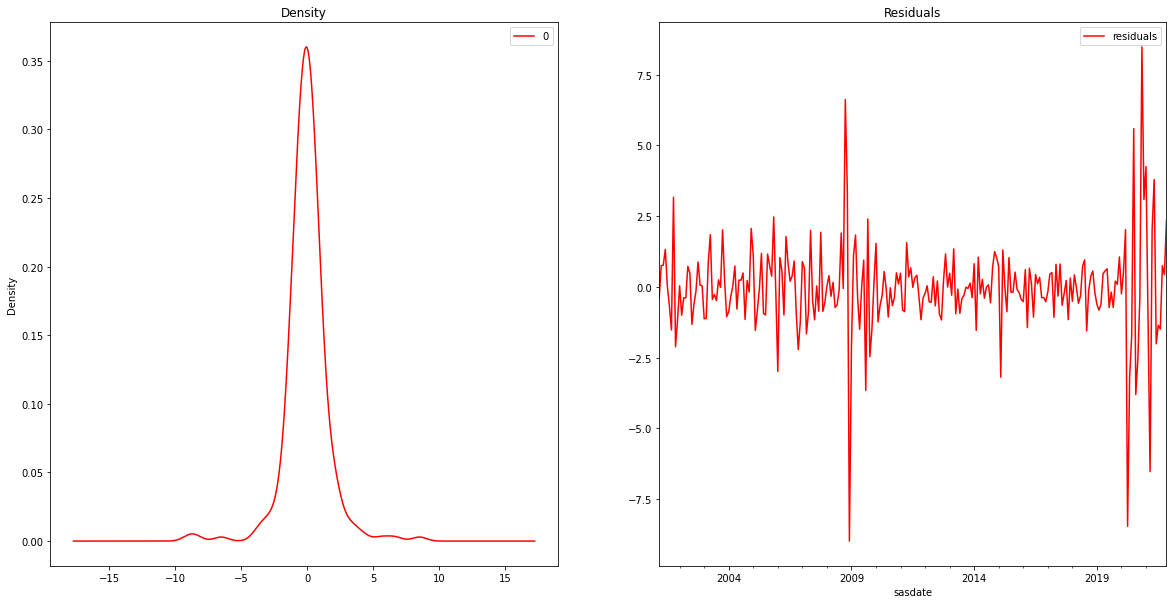

In [ ]:
pred_df = pd.DataFrame(predictions)
observed_df = pd.DataFrame(observed)
residuals = pd.DataFrame(pred_df - observed_df)
residuals_date = date.merge(residuals, left_index = True, right_index = True, how = "left")
residuals_date.index = pd.DatetimeIndex(residuals_date["sasdate"])
residuals_date = residuals_date.drop(columns = ["sasdate"])
fig, ax = plt.subplots(1,2, figsize = (20, 10))
residuals.plot(kind='kde', title='Density', ax=ax[0], color = "red")
residuals_date.plot(title="Residuals", ax=ax[1], color = "red")
plt.legend(["residuals"])
plt.show()

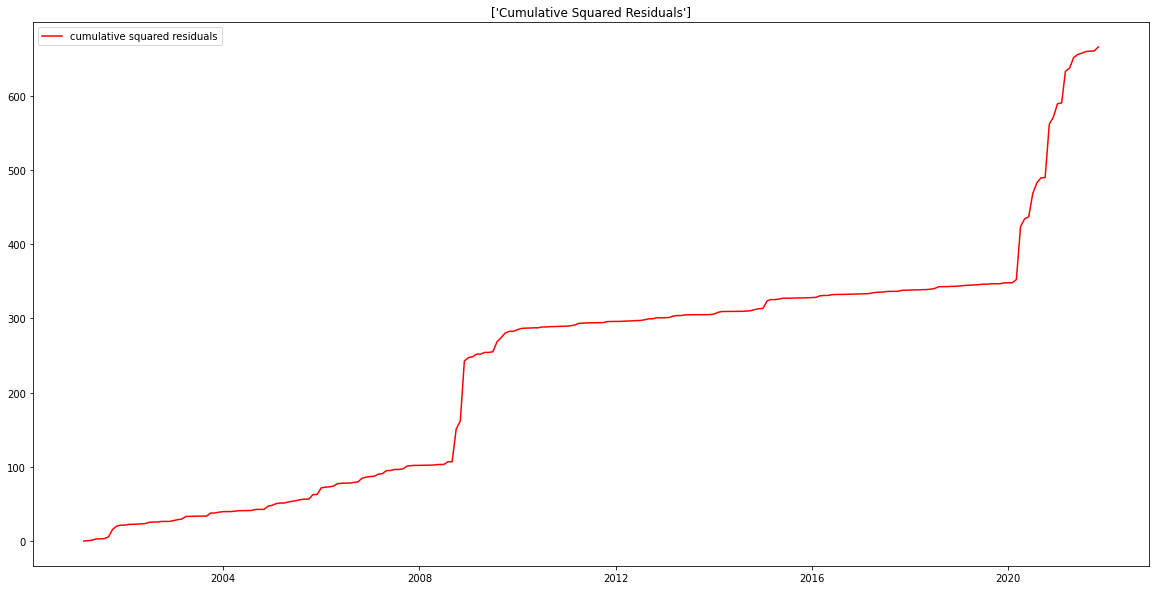

In [ ]:
squared_residuals = residuals**2
cumsum_sqd_residuals = np.cumsum(squared_residuals)
cumsum_sqd_residuals_date = date.merge(cumsum_sqd_residuals, left_index = True, right_index = True, how = "left")
cumsum_sqd_residuals_date.index = pd.DatetimeIndex(cumsum_sqd_residuals_date["sasdate"])
cumsum_sqd_residuals_date = cumsum_sqd_residuals_date.drop(columns = ["sasdate"])

plt.figure(figsize= (20, 10))

plt.plot(cumsum_sqd_residuals_date, color = "red")
plt.title(["Cumulative Squared Residuals"])
plt.legend(["cumulative squared residuals"], loc = "upper left")

In [ ]:
pred = pd.DataFrame(predictions)
observedd = pd.DataFrame(observed)

In [ ]:
pred.shape, observedd.shape, date.shape

((249, 1), (249, 1), (249, 1))

In [ ]:
df_1 = date.merge(pred, left_index = True, right_index = True, how = "left")
df = df_1.merge(observedd, left_index = True, right_index = True, how = "left")

In [ ]:
df.index = pd.DatetimeIndex(df["sasdate"])
df = df.drop(columns = ["sasdate"])
df.head()

,0_x,0_y
sasdate,,
2001-03-01,-1.038326,-0.639641
2001-04-01,1.173139,0.418362
2001-05-01,2.024116,1.254507
2001-06-01,0.267383,-1.057329
2001-07-01,-1.460783,-1.473761


In [ ]:
df = df.rename(columns = {"0_x" : "pred", "0_y" : "observed"})
df.head()

,pred,observed
sasdate,,
2001-03-01,-1.038326,-0.639641
2001-04-01,1.173139,0.418362
2001-05-01,2.024116,1.254507
2001-06-01,0.267383,-1.057329
2001-07-01,-1.460783,-1.473761


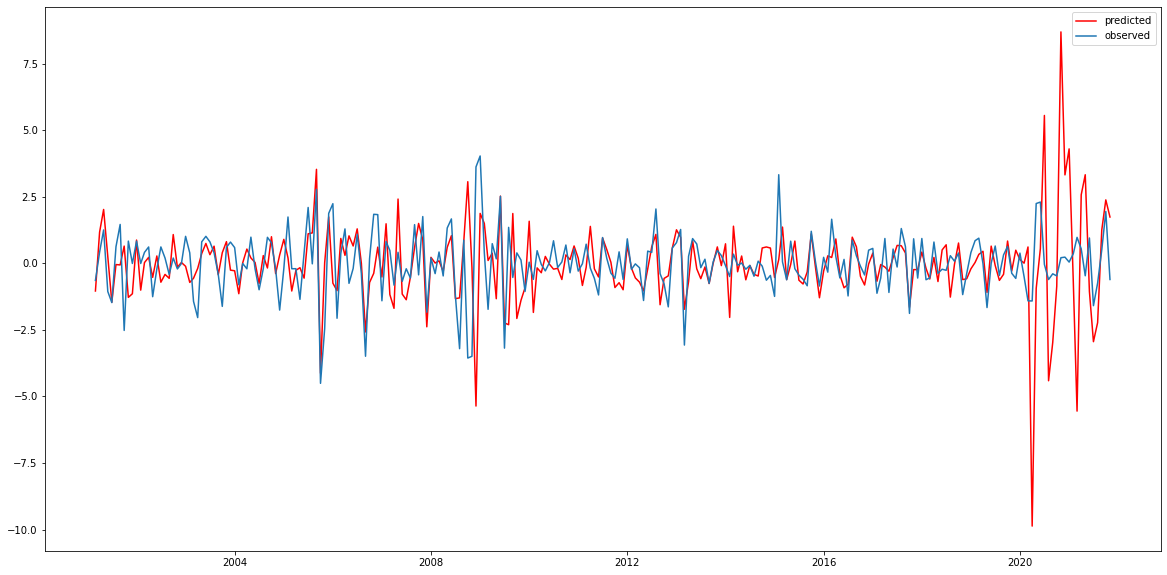

In [ ]:
plt.figure(figsize= (20, 10))
plt.plot(df["pred"], color = "red")
plt.plot(df["observed"])
plt.legend(["predicted", "observed"])
plt.show()

The Autoregressive Ridge Model seems to be more accurate than the AR and the Autoregressive PCR Model, however, it makes large errors during the pandemic period, possibly because the explanatory variables referring to the economy have presented unusual values. In addition, it is also possible to observe a jump in the errors accumulated in the period of 2008 and 2020, that is, the period of the international financial crisis and pandemic, respectively. The Ridge had an MSE of 2.67, RMSE of 1.63 and an MAE of 0.99.

<h3> b) <h3>

In [ ]:
df_importances = pd.DataFrame(importance_agg, columns = cols_names)
df_importances.head()

RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO   IPFPNSS  \
0 -0.009171 -0.000883        -0.032815  0.055923 -0.014056 -0.013942   
1 -0.009248  0.000070        -0.032824  0.056138 -0.014107 -0.013823   
2 -0.009012  0.001498        -0.032585  0.056526 -0.013534 -0.013046   
3 -0.007157  0.003416        -0.038339  0.059373 -0.013591 -0.012643   
4 -0.006954  0.004074        -0.038381  0.059966 -0.011754 -0.011029   

    IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT    IPDMAT  \
0  0.011085  0.044282  0.028045  0.033003 -0.003201  0.000437  0.011152   
1  0.011217  0.044085  0.028326  0.032515 -0.003102  0.000135  0.010437   
2  0.012069  0.042894  0.025581  0.033492  0.002717  0.000584  0.008435   
3  0.012364  0.042304  0.025709  0.032590  0.003383  0.000720  0.009688   
4  0.012776  0.041883  0.025948  0.032803  0.003869  0.004422  0.010280   

     IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV    CE16OV  \
0 -0.027120  -0.009587   0.015809  0.043260 -0.013022 -0.042928 -0.023207   
1 -0.027210  -0.009146   0.013533  0.044382 -0.012475 -0.042875 -0.022633   
2 -0.025686  -0.010008   0.013919  0.042349 -0.013632 -0.046212 -0.023799   
3 -0.025046  -0.010664   0.017280  0.040030 -0.014410 -0.044850 -0.023614   
4 -0.023816  -0.009962   0.015725  0.038640 -0.013706 -0.045012 -0.022884   

     UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  UEMP27OV  \
0  0.010264 -0.039940  0.054555  -0.004045  0.014083  -0.009654  0.069996   
1  0.010301 -0.039589  0.054687  -0.003187  0.013661  -0.009392  0.069348   
2  0.010705 -0.038881  0.053130   0.001692  0.015495  -0.008322  0.072184   
3  0.010307 -0.039545  0.056234   0.003159  0.015061  -0.009544  0.073403   
4  0.009790 -0.037968  0.053985   0.005750  0.017852  -0.008245  0.074584   

    CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP   DMANEMP  \
0  0.022591 -0.001538 -0.012144      -0.024021 -0.039946  0.003830  0.001264   
1  0.022095 -0.001644 -0.012172      -0.024736 -0.039568  0.003723  0.000720   
2  0.023552 -0.001873 -0.011777      -0.025384 -0.041188  0.004110  0.001496   
3  0.022761 -0.003311 -0.011422      -0.028615 -0.036408  0.005166  0.002760   
4  0.025198 -0.003193 -0.010905      -0.027405 -0.035584  0.005578  0.002569   

   NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE    USGOVT  \
0  0.007923  0.000078 -0.005514 -0.006936  0.009877 -0.021081 -0.031226   
1  0.008896 -0.000021 -0.005675 -0.007939  0.009706 -0.021572 -0.029082   
2  0.008661 -0.000358 -0.006057 -0.006121  0.007931 -0.021735 -0.030497   
3  0.008897 -0.002046 -0.010367 -0.004485  0.006334 -0.025208 -0.034771   
4  0.010801 -0.001926 -0.011196 -0.004442  0.006736 -0.022793 -0.036068   

   CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW    HOUSTS  \
0      -0.028170  0.013081  0.014075 -0.002462 -0.017505 -0.010922 -0.018851   
1      -0.029637  0.013317  0.013629 -0.002378 -0.016344 -0.010186 -0.019003   
2      -0.031426  0.018419  0.013722 -0.001309 -0.015902 -0.009671 -0.017845   
3      -0.031250  0.022518  0.011812 -0.002443 -0.015277 -0.012699 -0.018035   
4      -0.029613  0.021254  0.015345 -0.004763 -0.016734 -0.015347 -0.020712   

     HOUSTW   AMDMNOx   AMDMUOx          M1SL      M2SL    M2REAL  BOGMBASE  \
0  0.025427 -0.028233  0.017216  5.578988e-07  0.017866 -0.231738  0.001023   
1  0.024266 -0.028319  0.017673  5.587926e-07  0.018259 -0.232179  0.001026   
2  0.026201 -0.025656  0.015756  5.633573e-07  0.017335 -0.233750  0.001024   
3  0.024494 -0.022449  0.018332  5.686450e-07  0.017522 -0.231437  0.001008   
4  0.024610 -0.022688  0.014343  5.832042e-07  0.017483 -0.233247  0.001021   

   TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  FEDFUNDS  \
0 -0.000142   0.000044  0.004856  0.009053 -0.003931     0.016293 -0.000828   
1 -0.000143   0.000041  0.004923  0.009674 -0.004379     0.015905 -0.000742   
2 -0.000151   0.000029  0.004614  0.013204 -0.004354     0.016162  0.0015

In [ ]:
df_importances.shape

(249, 1351)

In [ ]:
df_rel_importances = df_importances.copy()
df_rel_importances["sum"] = df_rel_importances.abs().sum(axis = 1)
df_rel_importances["sum"].head()

0    24.784660
1    24.757548
2    24.747480
3    24.711304
4    24.845693
Name: sum, dtype: float64

In [ ]:
df_rel_importances.head()

RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO   IPFPNSS  \
0 -0.009171 -0.000883        -0.032815  0.055923 -0.014056 -0.013942   
1 -0.009248  0.000070        -0.032824  0.056138 -0.014107 -0.013823   
2 -0.009012  0.001498        -0.032585  0.056526 -0.013534 -0.013046   
3 -0.007157  0.003416        -0.038339  0.059373 -0.013591 -0.012643   
4 -0.006954  0.004074        -0.038381  0.059966 -0.011754 -0.011029   

    IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT    IPDMAT  \
0  0.011085  0.044282  0.028045  0.033003 -0.003201  0.000437  0.011152   
1  0.011217  0.044085  0.028326  0.032515 -0.003102  0.000135  0.010437   
2  0.012069  0.042894  0.025581  0.033492  0.002717  0.000584  0.008435   
3  0.012364  0.042304  0.025709  0.032590  0.003383  0.000720  0.009688   
4  0.012776  0.041883  0.025948  0.032803  0.003869  0.004422  0.010280   

     IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV    CE16OV  \
0 -0.027120  -0.009587   0.015809  0.043260 -0.013022 -0.042928 -0.023207   
1 -0.027210  -0.009146   0.013533  0.044382 -0.012475 -0.042875 -0.022633   
2 -0.025686  -0.010008   0.013919  0.042349 -0.013632 -0.046212 -0.023799   
3 -0.025046  -0.010664   0.017280  0.040030 -0.014410 -0.044850 -0.023614   
4 -0.023816  -0.009962   0.015725  0.038640 -0.013706 -0.045012 -0.022884   

     UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  UEMP27OV  \
0  0.010264 -0.039940  0.054555  -0.004045  0.014083  -0.009654  0.069996   
1  0.010301 -0.039589  0.054687  -0.003187  0.013661  -0.009392  0.069348   
2  0.010705 -0.038881  0.053130   0.001692  0.015495  -0.008322  0.072184   
3  0.010307 -0.039545  0.056234   0.003159  0.015061  -0.009544  0.073403   
4  0.009790 -0.037968  0.053985   0.005750  0.017852  -0.008245  0.074584   

    CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP   DMANEMP  \
0  0.022591 -0.001538 -0.012144      -0.024021 -0.039946  0.003830  0.001264   
1  0.022095 -0.001644 -0.012172      -0.024736 -0.039568  0.003723  0.000720   
2  0.023552 -0.001873 -0.011777      -0.025384 -0.041188  0.004110  0.001496   
3  0.022761 -0.003311 -0.011422      -0.028615 -0.036408  0.005166  0.002760   
4  0.025198 -0.003193 -0.010905      -0.027405 -0.035584  0.005578  0.002569   

   NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE    USGOVT  \
0  0.007923  0.000078 -0.005514 -0.006936  0.009877 -0.021081 -0.031226   
1  0.008896 -0.000021 -0.005675 -0.007939  0.009706 -0.021572 -0.029082   
2  0.008661 -0.000358 -0.006057 -0.006121  0.007931 -0.021735 -0.030497   
3  0.008897 -0.002046 -0.010367 -0.004485  0.006334 -0.025208 -0.034771   
4  0.010801 -0.001926 -0.011196 -0.004442  0.006736 -0.022793 -0.036068   

   CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW    HOUSTS  \
0      -0.028170  0.013081  0.014075 -0.002462 -0.017505 -0.010922 -0.018851   
1      -0.029637  0.013317  0.013629 -0.002378 -0.016344 -0.010186 -0.019003   
2      -0.031426  0.018419  0.013722 -0.001309 -0.015902 -0.009671 -0.017845   
3      -0.031250  0.022518  0.011812 -0.002443 -0.015277 -0.012699 -0.018035   
4      -0.029613  0.021254  0.015345 -0.004763 -0.016734 -0.015347 -0.020712   

     HOUSTW   AMDMNOx   AMDMUOx          M1SL      M2SL    M2REAL  BOGMBASE  \
0  0.025427 -0.028233  0.017216  5.578988e-07  0.017866 -0.231738  0.001023   
1  0.024266 -0.028319  0.017673  5.587926e-07  0.018259 -0.232179  0.001026   
2  0.026201 -0.025656  0.015756  5.633573e-07  0.017335 -0.233750  0.001024   
3  0.024494 -0.022449  0.018332  5.686450e-07  0.017522 -0.231437  0.001008   
4  0.024610 -0.022688  0.014343  5.832042e-07  0.017483 -0.233247  0.001021   

   TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  FEDFUNDS  \
0 -0.000142   0.000044  0.004856  0.009053 -0.003931     0.016293 -0.000828   
1 -0.000143   0.000041  0.004923  0.009674 -0.004379     0.015905 -0.000742   
2 -0.000151   0.000029  0.004614  0.013204 -0.004354     0.016162  0.0015

The importances are transformed to percentages.

In [ ]:
for col in df_rel_importances.columns[:-1]:
  df_rel_importances[col] = (df_rel_importances[col].abs()*100)/df_rel_importances["sum"]
df_rel_importances.head()

RPI   W875RX1  DPCERA3M086SBEA   RETAILx    INDPRO   IPFPNSS  \
0  0.037003  0.003562         0.132401  0.225637  0.056712  0.056254   
1  0.037354  0.000281         0.132581  0.226750  0.056983  0.055833   
2  0.036416  0.006053         0.131668  0.228413  0.054690  0.052715   
3  0.028962  0.013824         0.155150  0.240268  0.054999  0.051163   
4  0.027989  0.016397         0.154478  0.241352  0.047308  0.044391   

    IPFINAL   IPCONGD  IPDCONGD  IPNCONGD   IPBUSEQ     IPMAT    IPDMAT  \
0  0.044725  0.178666  0.113155  0.133159  0.012915  0.001765  0.044995   
1  0.045306  0.178065  0.114412  0.131335  0.012528  0.000545  0.042155   
2  0.048767  0.173326  0.103368  0.135334  0.010979  0.002360  0.034085   
3  0.050035  0.171193  0.104039  0.131882  0.013690  0.002914  0.039206   
4  0.051420  0.168572  0.104437  0.132028  0.015571  0.017799  0.041373   

     IPNMAT  IPMANSICS  IPB51222S   IPFUELS    CUMFNS   CLF16OV    CE16OV  \
0  0.109421   0.038683   0.063785  0.174542  0.052539  0.173204  0.093634   
1  0.109905   0.036943   0.054663  0.179268  0.050389  0.173181  0.091417   
2  0.103793   0.040439   0.056244  0.171123  0.055084  0.186735  0.096169   
3  0.101355   0.043154   0.069926  0.161989  0.058313  0.181495  0.095558   
4  0.095856   0.040095   0.063289  0.155520  0.055165  0.181168  0.092105   

     UNRATE  UEMPMEAN   UEMPLT5  UEMP5TO14  UEMP15OV  UEMP15T26  UEMP27OV  \
0  0.041412  0.161147  0.220115   0.016319  0.056823   0.038951  0.282416   
1  0.041606  0.159909  0.220889   0.012874  0.055178   0.037935  0.280109   
2  0.043257  0.157110  0.214689   0.006838  0.062613   0.033627  0.291681   
3  0.041710  0.160027  0.227562   0.012784  0.060949   0.038621  0.297043   
4  0.039404  0.152816  0.217281   0.023144  0.071850   0.033186  0.300189   

    CLAIMSx    PAYEMS    USGOOD  CES1021000001    USCONS    MANEMP   DMANEMP  \
0  0.091150  0.006204  0.049000       0.096917  0.161171  0.015454  0.005099   
1  0.089247  0.006642  0.049166       0.099914  0.159822  0.015037  0.002908   
2  0.095169  0.007569  0.047589       0.102573  0.166431  0.016606  0.006044   
3  0.092107  0.013398  0.046221       0.115797  0.147333  0.020905  0.011171   
4  0.101418  0.012852  0.043892       0.110301  0.143218  0.022452  0.010341   

   NDMANEMP    SRVPRD     USTPU  USWTRADE   USTRADE    USFIRE    USGOVT  \
0  0.031965  0.000317  0.022247  0.027984  0.039850  0.085057  0.125991   
1  0.035932  0.000084  0.022923  0.032068  0.039205  0.087135  0.117467   
2  0.034998  0.001448  0.024476  0.024733  0.032046  0.087828  0.123233   
3  0.036003  0.008280  0.041952  0.018151  0.025632  0.102011  0.140710   
4  0.043472  0.007751  0.045063  0.017878  0.027113  0.091739  0.145168   

   CES0600000007   AWOTMAN    AWHMAN     HOUST   HOUSTNE   HOUSTMW    HOUSTS  \
0       0.113657  0.052777  0.056787  0.009932  0.070629  0.044067  0.076058   
1       0.119707  0.053790  0.055052  0.009605  0.066016  0.041144  0.076755   
2       0.126987  0.074429  0.055449  0.005291  0.064257  0.039078  0.072108   
3       0.126461  0.091125  0.047801  0.009885  0.061824  0.051388  0.072984   
4       0.119188  0.085543  0.061763  0.019169  0.067351  0.061768  0.083364   

     HOUSTW   AMDMNOx   AMDMUOx      M1SL      M2SL    M2REAL  BOGMBASE  \
0  0.102592  0.113914  0.069464  0.000002  0.072086  0.935008  0.004129   
1  0.098014  0.114387  0.071384  0.000002  0.073750  0.937809  0.004145   
2  0.105873  0.103672  0.063668  0.000002  0.070049  0.944543  0.004139   
3  0.099121  0.090846  0.074185  0.000002  0.070906  0.936564  0.004079   
4  0.099053  0.091317  0.057727  0.000002  0.070368  0.938783  0.004107   

   TOTRESNS  NONBORRES  BUSLOANS    REALLN   S&P 500  S&P: indust  FEDFUNDS  \
0  0.000571   0.000177  0.019594  0.036527  0.015862     0.065740  0.003341   
1  0.000576   0.000166  0.019883  0.039076  0.017689     0.064243  0.002998   
2  0.000610   0.000117  0.018646  0.053355  0.017593     0.065306  0.006249   
3  0.000588   0.00

In [ ]:
df_rel_importances["test"] = df_rel_importances.sum(axis = 1) - df_rel_importances["sum"]
df_rel_importances["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

In [ ]:
df_rel_importances.shape

(249, 1353)

In [ ]:
df_rel_importances = df_rel_importances.drop(columns = ["sum", "test"])
df_rel_importances.shape

(249, 1351)

In [ ]:
group_1 = ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD",
           "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "NAPMPI", "CUMFNS"]

group_2 = ["HWI", "HWIURATIO", "CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26",
           "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP", "DMANEMP", "NDMANEMP",
           "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT", "CES0600000007", "AWOTMAN", "AWHMAN", "NAPMEI",
           "CES0600000008", "CES2000000008", "CES3000000008"]

group_3 = ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW", "PERMIT", "PERMITNE", "PERMITMW", "PERMITS", "PERMITW"]

group_4 =  ["DPCERA3M086SBEA", "CMRMTSPLx", "RETAILx", "NAPM", "NAPMNOI", "NAPMSDI", "NAPMII", "ACOGNO", "AMDMNOx",
            "ANDENOx", "AMDMUOx", "BUSINVx", "ISRATIOx", "UMCSENTx"]

group_5 = ["M1SL", "M2SL", "M2REAL", "AMBSL", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN", "NONREVSL", "CONSPI", "MZMSL",
           "DTCOLNVHFNM", "DTCTHFNM", "INVEST"] 

group_6 = ["FEDFUNDS", "CP3Mx", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA", "COMPAPFFx",
           "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM", "TWEXMMTH",
           "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]

group_7 = ["PPIFGS", "PPIFCG", "PPIITM", "PPICRM", "OILPRICEx", "PPICMM", "NAPMPRI", "CPIAPPSL", "CPITRNSL",
           "CPIMEDSL", "CUSR0000SAC", "CUUR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUUR0000SA0L2", "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA",
           "DNDGRG3M086SBEA", "DSERRG3M086SBEA"]

group_8 = ["S&P 500", "S&P: indust", "S&P div yield", "S&P PE ratio"] 

group_9 = ["CPIAUCSL_diff_lag_1", "CPIAUCSL_diff_lag_2", "CPIAUCSL_diff_lag_3", "CPIAUCSL_diff_lag_4", "CPIAUCSL_diff_lag_5",
           "CPIAUCSL_diff_lag_6", "CPIAUCSL_diff_lag_7", "CPIAUCSL_diff_lag_8", "CPIAUCSL_diff_lag_9", "CPIAUCSL_diff_lag_10",
           "CPIAUCSL_diff_lag_11", "CPIAUCSL_diff_lag_12"]

In [ ]:
len(group_1 + group_2 + group_3 + group_4 + group_5 +  group_6 +  group_7 + group_8 + group_9)

145

Na's variables dropped in the first notebook (AR model).

In [ ]:
na_cols = ['CMRMTSPLx',
 'HWI',
 'HWIURATIO',
 'PERMIT',
 'PERMITNE',
 'PERMITMW',
 'PERMITS',
 'PERMITW',
 'ACOGNO',
 'ANDENOx',
 'BUSINVx',
 'ISRATIOx',
 'NONREVSL',
 'CONSPI',
 'S&P div yield',
 'S&P PE ratio',
 'CP3Mx',
 'COMPAPFFx',
 'TWEXAFEGSMTHx',
 'UMCSENTx',
 'DTCOLNVHFNM',
 'DTCTHFNM',
 'VIXCLSx']

In [ ]:
len(na_cols)

23

In [ ]:
df_rel_importances.shape

(249, 1351)

Now, we aggregate the lags into the original variables. Remembering that as the variables are standardized in percentage of importance, their sum indicates the percentage of importance of the original variable and its lags.

In [ ]:
lags_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df_agg_lags = df_rel_importances.copy()
for col in df_agg_lags.columns[0: 103]:
  for i in lags_range:
    df_agg_lags[col] = df_agg_lags[col] + df_agg_lags[col + "_lag_" + str(i)]
    df_agg_lags = df_agg_lags.drop(columns = [col + "_lag_" + str(i)])

In [ ]:
df_agg_lags.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12
0,0.561771,1.151621,1.061214,1.080904,0.566898,0.582018,0.469944,0.753926,0.853296,1.371107,0.598518,0.741673,0.582071,0.726211,0.935814,1.245178,1.460235,1.216372,1.396504,0.379004,0.361358,0.848401,0.936685,1.361804,0.790501,0.725760,0.873454,0.766058,0.237162,0.542927,1.521568,1.330920,0.673242,1.128578,0.827729,0.192080,0.450878,0.916278,0.507896,1.158368,1.369100,0.431926,1.279433,0.646185,0.334467,0.876886,0.622167,0.827987,0.620179,0.900975,1.301966,0.000008,0.241025,2.867961,0.020562,0.004952,0.006614,0.204367,0.795872,0.658013,0.942135,0.966653,1.208684,1.680629,1.220735,1.162913,1.330969,1.914927,1.584807,0.997232,0.617476,0.584952,0.219247,0.161632,0.292171,0.168500,1.088253,1.504248,1.385359,1.067560,1.082502,0.966140,0.895634,1.049335,1.634667,0.800572,0.757793,0.226022,1.908765,0.541264,0.486474,1.853190,2.212773,1.036390,2.387723,1.839290,1.211543,0.720477,1.688580,1.489062,2.448968,1.265874,0.886733,0.939118,0.526231,0.481799,0.041289,0.010759,0.120234,0.010576,0.134867,0.020050,0.023311,0.122053,0.184292
1,0.566434,1.146769,1.055871,1.080707,0.567724,0.580588,0.465324,0.749753,0.841033,1.390716,0.596582,0.729224,0.558737,0.716466,0.925437,1.241700,1.474188,1.205646,1.396433,0.380826,0.369954,0.843434,0.941487,1.345115,0.791633,0.726446,0.864846,0.773189,0.238576,0.541775,1.520355,1.317017,0.671306,1.113775,0.822587,0.193602,0.462269,0.930492,0.514783,1.171926,1.352779,0.443506,1.263195,0.652030,0.336468,0.882396,0.614234,0.829475,0.628278,0.914077,1.295565,0.000008,0.240867,2.869619,0.020484,0.004933,0.006486,0.206042,0.805629,0.661572,0.952750,0.952920,1.212170,1.683636,1.222822,1.189026,1.344639,1.918271,1.557886,0.992833,0.613662,0.585950,0.213732,0.160115,0.300731,0.166806,1.084926,1.508622,1.377543,1.065669,1.083021,0.966597,0.900285,1.059262,1.638340,0.789045,0.757324,0.224854,1.909114,0.538201,0.482194,1.869054,2.217059,1.047218,2.399708,1.825881,1.217642,0.717888,1.698314,1.488386,2.443309,1.279721,0.881732,0.940411,0.517547,0.481866,0.037504,0.007510,0.122926,0.005283,0.139586,0.027392,0.018754,0.128595,0.181399
2,0.572511,1.124728,1.051697,1.056372,0.576681,0.601903,0.470428,0.775990,0.850388,1.380618,0.603650,0.706121,0.524998,0.711360,0.913712,1.259969,1.486666,1.185796,1.406429,0.360899,0.371457,0.851505,0.920041,1.281190,0.785164,0.726975,0.887559,0.806113,0.247875,0.548389,1.553966,1.338839,0.724122,1.194998,0.884971,0.201380,0.446869,0.956225,0.515818,1.106027,1.233206,0.432196,1.293957,0.651062,0.343603,0.955088,0.601647,0.820601,0.687106,0.893965,1.309853,0.000008,0.233439,2.882672,0.021421,0.004954,0.006196,0.195044,0.821368,0.709919,0.978524,0.921986,1.200322,1.693474,1.222365,1.217936,1.369631,1.861497,1.487042,0.969322,0.645471,0.579636,0.233903,0.152494,0.314642,0.160348,1.018952,1.576032,1.363025,1.102813,1.073142,0.974585,0.894916,1.104523,1.618408,0.796151,0.760446,0.231535,1.88

In [ ]:
df_agg_lags.shape

(249, 115)

Adding the columns per row to confirm the total is 100.

In [ ]:
df_agg_lags["test"] = df_agg_lags.sum(axis = 1)
df_agg_lags["test"].head()

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: test, dtype: float64

Now, we need to check that the per-group variables provided by the St. Louis match the base variables.

Names of the database variables

In [ ]:
data_cols_test = df_agg_lags.columns[0:103]
data_cols_test_df = pd.DataFrame(data_cols_test, columns = ["data"])
data_cols_test_df = data_cols_test_df.reindex(sorted(data_cols_test_df.columns), axis=1)
data_cols_test_df.head()

,data
0,RPI
1,W875RX1
2,DPCERA3M086SBEA
3,RETAILx
4,INDPRO


Name of the per-group variables provided by the Fed

In [ ]:
groups_cols = group_1 + group_2 + group_3 + group_4 + group_5 +  group_6 +  group_7 + group_8 + group_9
groups_cols_df = pd.DataFrame(groups_cols, columns = ["groups"])
groups_cols_df = groups_cols_df.reindex(sorted(groups_cols_df.columns), axis=1)
groups_cols_df.head()

,groups
0,RPI
1,W875RX1
2,INDPRO
3,IPFPNSS
4,IPFINAL


In [ ]:
mg_left = pd.merge(data_cols_test_df, groups_cols_df[:-12], left_on = "data", right_on = "groups", how = "left")
mg_right = pd.merge(data_cols_test_df, groups_cols_df[:-12], left_on = "data", right_on = "groups", how = "right")

In [ ]:
mg_left["test"] = np.where(mg_left["data"] == mg_left["groups"], 1, 0)

In [ ]:
mg_right["test"] = np.where(mg_right["data"] == mg_right["groups"], 1, 0)

In [ ]:
test_left = mg_left[mg_left["test"] == 0]
test_left.shape

(8, 3)

We have 8 variables in database that doesnt match the Fed groups.

In [ ]:
test_right = mg_right[mg_right["test"] == 0]
test_right.shape

(38, 3)

We have 38 variables from the Fed groups that don't match the variable names in the database.

In [ ]:
test_left

,data,groups,test
15,IPB51222S,NaN,0
54,BOGMBASE,NaN,0
80,WPSFD49207,NaN,0
81,WPSFD49502,NaN,0
82,WPSID61,NaN,0
83,WPSID62,NaN,0
90,CUSR0000SAD,NaN,0
93,CUSR0000SA0L2,NaN,0


Names of the 8 variables that are in the database and not in the fed groups.

In [ ]:
test_right

,data,groups,test
13,NaN,IPB51222s,0
15,NaN,NAPMPI,0
17,NaN,HWI,0
18,NaN,HWIURATIO,0
45,NaN,NAPMEI,0
54,NaN,PERMIT,0
55,NaN,PERMITNE,0
56,NaN,PERMITMW,0
57,NaN,PERMITS,0
58,NaN,PERMITW,0


Names of 38 variables that are in Fed group and not are in Database.

In [ ]:
na_cols_df = pd.DataFrame(na_cols, columns = ["Na"])
na_cols_df

,Na
0,CMRMTSPLx
1,HWI
2,HWIURATIO
3,PERMIT
4,PERMITNE
5,PERMITMW
6,PERMITS
7,PERMITW
8,ACOGNO
9,ANDENOx


Above, 22 variables has been dropped in the first notebook (AR). Below we can see the variables that were dropped and that are also in the Fed groups.

In [ ]:
test_right_na = pd.merge(test_right, na_cols_df, left_on = "groups", right_on = "Na", how = "left")
test_right_na = test_right_na.drop(columns= ["data", "test"])
test_right_na

In [ ]:
test_right_na["test"] =  np.where(test_right_na["groups"] == test_right_na["Na"], 1, 0)
test_right_na

In [ ]:
test_right_no_na = test_right_na[test_right_na["test"] == 0]
test_right_no_na

These are the variables for the Fed groups that are not actually in the database.

In [ ]:
test_left = test_left.drop(columns = ["groups", "test"])
test_left

,data
15,IPB51222S
54,BOGMBASE
80,WPSFD49207
81,WPSFD49502
82,WPSID61
83,WPSID62
90,CUSR0000SAD
93,CUSR0000SA0L2


We can see that some variables that are in the base are with different names from the variables of the groups, let's change these names, for the others we will create a tenth group.

In [ ]:
df_agg_lags.head()

,RPI,W875RX1,DPCERA3M086SBEA,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,AMDMNOx,AMDMUOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,S&P 500,S&P: indust,FEDFUNDS,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,INVEST,CPIAUCSL_diff_lag_1,CPIAUCSL_diff_lag_2,CPIAUCSL_diff_lag_3,CPIAUCSL_diff_lag_4,CPIAUCSL_diff_lag_5,CPIAUCSL_diff_lag_6,CPIAUCSL_diff_lag_7,CPIAUCSL_diff_lag_8,CPIAUCSL_diff_lag_9,CPIAUCSL_diff_lag_10,CPIAUCSL_diff_lag_11,CPIAUCSL_diff_lag_12,test
0,0.561771,1.151621,1.061214,1.080904,0.566898,0.582018,0.469944,0.753926,0.853296,1.371107,0.598518,0.741673,0.582071,0.726211,0.935814,1.245178,1.460235,1.216372,1.396504,0.379004,0.361358,0.848401,0.936685,1.361804,0.790501,0.725760,0.873454,0.766058,0.237162,0.542927,1.521568,1.330920,0.673242,1.128578,0.827729,0.192080,0.450878,0.916278,0.507896,1.158368,1.369100,0.431926,1.279433,0.646185,0.334467,0.876886,0.622167,0.827987,0.620179,0.900975,1.301966,0.000008,0.241025,2.867961,0.020562,0.004952,0.006614,0.204367,0.795872,0.658013,0.942135,0.966653,1.208684,1.680629,1.220735,1.162913,1.330969,1.914927,1.584807,0.997232,0.617476,0.584952,0.219247,0.161632,0.292171,0.168500,1.088253,1.504248,1.385359,1.067560,1.082502,0.966140,0.895634,1.049335,1.634667,0.800572,0.757793,0.226022,1.908765,0.541264,0.486474,1.853190,2.212773,1.036390,2.387723,1.839290,1.211543,0.720477,1.688580,1.489062,2.448968,1.265874,0.886733,0.939118,0.526231,0.481799,0.041289,0.010759,0.120234,0.010576,0.134867,0.020050,0.023311,0.122053,0.184292,100.0
1,0.566434,1.146769,1.055871,1.080707,0.567724,0.580588,0.465324,0.749753,0.841033,1.390716,0.596582,0.729224,0.558737,0.716466,0.925437,1.241700,1.474188,1.205646,1.396433,0.380826,0.369954,0.843434,0.941487,1.345115,0.791633,0.726446,0.864846,0.773189,0.238576,0.541775,1.520355,1.317017,0.671306,1.113775,0.822587,0.193602,0.462269,0.930492,0.514783,1.171926,1.352779,0.443506,1.263195,0.652030,0.336468,0.882396,0.614234,0.829475,0.628278,0.914077,1.295565,0.000008,0.240867,2.869619,0.020484,0.004933,0.006486,0.206042,0.805629,0.661572,0.952750,0.952920,1.212170,1.683636,1.222822,1.189026,1.344639,1.918271,1.557886,0.992833,0.613662,0.585950,0.213732,0.160115,0.300731,0.166806,1.084926,1.508622,1.377543,1.065669,1.083021,0.966597,0.900285,1.059262,1.638340,0.789045,0.757324,0.224854,1.909114,0.538201,0.482194,1.869054,2.217059,1.047218,2.399708,1.825881,1.217642,0.717888,1.698314,1.488386,2.443309,1.279721,0.881732,0.940411,0.517547,0.481866,0.037504,0.007510,0.122926,0.005283,0.139586,0.027392,0.018754,0.128595,0.181399,100.0
2,0.572511,1.124728,1.051697,1.056372,0.576681,0.601903,0.470428,0.775990,0.850388,1.380618,0.603650,0.706121,0.524998,0.711360,0.913712,1.259969,1.486666,1.185796,1.406429,0.360899,0.371457,0.851505,0.920041,1.281190,0.785164,0.726975,0.887559,0.806113,0.247875,0.548389,1.553966,1.338839,0.724122,1.194998,0.884971,0.201380,0.446869,0.956225,0.515818,1.106027,1.233206,0.432196,1.293957,0.651062,0.343603,0.955088,0.601647,0.820601,0.687106,0.893965,1.309853,0.000008,0.233439,2.882672,0.021421,0.004954,0.006196,0.195044,0.821368,0.709919,0.978524,0.921986,1.200322,1.693474,1.222365,1.217936,1.369631,1.861497,1.487042,0.969322,0.645471,0.579636,0.233903,0.152494,0.314642,0.160348,1.018952,1.576032,1.363025,1.102813,1.073142,0.974585,0.894916,1.104523,1.618408,0.796151,0.760

In [ ]:
df_agg_lags = df_agg_lags.rename(columns = {"IPB51222S" : "IPB51222s", "CUSR0000SAD" : "CUUR0000SAD", "CUSR0000SA0L2" : "CUUR0000SA0L2"})

Now, we need drop variables names in groups that are in the Fed groups and are not in the database.

In [ ]:
test_right.head()

,data,groups,test
13,NaN,IPB51222s,0
15,NaN,NAPMPI,0
17,NaN,HWI,0
18,NaN,HWIURATIO,0
45,NaN,NAPMEI,0


In [ ]:
variables_to_drop = test_right.drop(columns = ["test", "data"])
variables_to_drop = variables_to_drop.reset_index(drop = True)
variables_to_drop

In [ ]:
variables_to_drop = variables_to_drop.drop(labels = [0,34,35], axis = 0)
variables_to_drop

Here are the updated groups. In which the variables that were in the Fed and were not in the database had their names excluded. The variables that were dropped in the first notebook because they had null values also had their names excluded. Variables that were under different names were updated in the base and those that were in the base and were not in the Fed were included in a tenth group.

In [ ]:
Output_and_Income = ["RPI", "W875RX1", "INDPRO", "IPFPNSS", "IPFINAL", "IPCONGD", "IPDCONGD", "IPNCONGD",
           "IPBUSEQ", "IPMAT", "IPDMAT", "IPNMAT", "IPMANSICS", "IPB51222s", "IPFUELS", "CUMFNS"]

Labor_Market = ["CLF16OV", "CE16OV", "UNRATE", "UEMPMEAN", "UEMPLT5", "UEMP5TO14", "UEMP15OV", "UEMP15T26",
           "UEMP27OV", "CLAIMSx", "PAYEMS", "USGOOD", "CES1021000001", "USCONS", "MANEMP", "DMANEMP", "NDMANEMP",
           "SRVPRD", "USTPU", "USWTRADE", "USTRADE", "USFIRE", "USGOVT", "CES0600000007", "AWOTMAN", "AWHMAN",
           "CES0600000008", "CES2000000008", "CES3000000008"]

Consumption_and_Orders = ["HOUST", "HOUSTNE", "HOUSTMW", "HOUSTS", "HOUSTW"]

Orders_and_Inventories =  ["DPCERA3M086SBEA", "RETAILx", "AMDMNOx",
            "AMDMUOx"]

Money_and_Credit = ["M1SL", "M2SL", "M2REAL", "TOTRESNS", "NONBORRES", "BUSLOANS", "REALLN",
           "INVEST"] 

Interest_and_Exhange = ["FEDFUNDS", "TB3MS", "TB6MS", "GS1", "GS5", "GS10", "AAA", "BAA",
           "TB3SMFFM", "TB6SMFFM", "T1YFFM", "T5YFFM", "T10YFFM", "AAAFFM", "BAAFFM",
           "EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx"]

Prices = ["OILPRICEx", "PPICMM", "CPIAPPSL", "CPITRNSL",
           "CPIMEDSL", "CUSR0000SAC", "CUUR0000SAD", "CUSR0000SAS", "CPIULFSL", "CUUR0000SA0L2", "CUSR0000SA0L5", "PCEPI", "DDURRG3M086SBEA",
           "DNDGRG3M086SBEA", "DSERRG3M086SBEA"]

Stock_Market = ["S&P 500", "S&P: indust"] 

Lags_CPI = ["CPIAUCSL_diff_lag_1", "CPIAUCSL_diff_lag_2", "CPIAUCSL_diff_lag_3", "CPIAUCSL_diff_lag_4", "CPIAUCSL_diff_lag_5",
           "CPIAUCSL_diff_lag_6", "CPIAUCSL_diff_lag_7", "CPIAUCSL_diff_lag_8", "CPIAUCSL_diff_lag_9", "CPIAUCSL_diff_lag_10",
           "CPIAUCSL_diff_lag_11", "CPIAUCSL_diff_lag_12"]

Others = ["BOGMBASE", "WPSFD49207", "WPSFD49502", "WPSID61", "WPSID62"]

In [ ]:
groups = [Output_and_Income, Labor_Market, Consumption_and_Orders, Orders_and_Inventories, Money_and_Credit,
          Interest_and_Exhange, Prices, Stock_Market, Lags_CPI, Others]

list_groups = []

for group in groups:
  g = df_agg_lags[group].sum(axis = 1)
  list_groups.append(g)

list_groups_transpose = np.transpose(list_groups)
list_groups_df = pd.DataFrame(list_groups_transpose)
list_groups_df

list_groups_df["test"] = list_groups_df.sum(axis = 1)
list_groups_df

,0,1,2,3,4,5,6,7,8,9,test
0,13.816651,26.857703,3.281685,4.345059,5.007531,19.156949,19.305522,1.600148,2.614579,4.014172,100.0
1,13.756320,26.854752,3.290851,4.346220,5.015316,19.151960,19.331837,1.614322,2.608773,4.029649,100.0
2,13.745518,26.684311,3.408045,4.311887,5.051002,19.090892,19.314523,1.688443,2.636792,4.068588,100.0
3,13.612349,26.877708,3.285888,4.325265,5.077336,18.942860,19.409500,1.685177,2.605903,4.178016,100.0
4,13.568100,26.802119,3.269894,4.241314,5.074786,19.155649,19.357838,1.711668,2.623101,4.195532,100.0
...,...,...,...,...,...,...,...,...,...,...,...
244,14.075232,25.711361,5.231334,4.544595,11.047705,13.922363,16.050840,1.361881,2.765468,5.289221,100.0
245,14.100840,25.758411,5.296224,4.612018,11.216222,13.992823,15.550823,1.404766,2.721900,5.345973,100.0
246,14.145148,25.662846,5.300847,4.605785,11.235529,14.009343,15.572962,1.409055,2.700780,5.357705,100.0
247,14.233607,25.619297,5.311602,4.644427,11.220346,14.009615,15.470810,1.384258,2.696171,5.409869,100.0


Now we are ready to do analysis. This table shows the importance porcentage aggregate by group per estimation. We have 10 groups and 249 estimations.

In [ ]:
groups_importances = list_groups_df.drop(columns = ["test"])
groups_importances = groups_importances.rename(columns = {0 : "Output_and_Income", 1 : "Labor_Market", 2 : "Consumption_and_Orders",
                                                          3 : "Orders_and_Inventories", 4 : "Money_and_Credit", 5 : "Interest_and_Exhange",
                                                          6 : "Prices", 7 : "Stock_Market", 8 : "Lags_CPI", 9 : "Others"})
groups_importances.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
0,13.816651,26.857703,3.281685,4.345059,5.007531,19.156949,19.305522,1.600148,2.614579,4.014172
1,13.756320,26.854752,3.290851,4.346220,5.015316,19.151960,19.331837,1.614322,2.608773,4.029649
2,13.745518,26.684311,3.408045,4.311887,5.051002,19.090892,19.314523,1.688443,2.636792,4.068588
3,13.612349,26.877708,3.285888,4.325265,5.077336,18.942860,19.409500,1.685177,2.605903,4.178016
4,13.568100,26.802119,3.269894,4.241314,5.074786,19.155649,19.357838,1.711668,2.623101,4.195532


In [ ]:
groups_importances_date = date.merge(groups_importances, left_index = True, right_index = True, how = "left")
groups_importances_date.index = pd.DatetimeIndex(groups_importances_date["sasdate"])
groups_importances_date = groups_importances_date.drop(columns = ["sasdate"])
groups_importances_date.head()

,Output_and_Income,Labor_Market,Consumption_and_Orders,Orders_and_Inventories,Money_and_Credit,Interest_and_Exhange,Prices,Stock_Market,Lags_CPI,Others
sasdate,,,,,,,,,,
2001-03-01,13.816651,26.857703,3.281685,4.345059,5.007531,19.156949,19.305522,1.600148,2.614579,4.014172
2001-04-01,13.756320,26.854752,3.290851,4.346220,5.015316,19.151960,19.331837,1.614322,2.608773,4.029649
2001-05-01,13.745518,26.684311,3.408045,4.311887,5.051002,19.090892,19.314523,1.688443,2.636792,4.068588
2001-06-01,13.612349,26.877708,3.285888,4.325265,5.077336,18.942860,19.409500,1.685177,2.605903,4.178016
2001-07-01,13.568100,26.802119,3.269894,4.241314,5.074786,19.155649,19.357838,1.711668,2.623101,4.195532


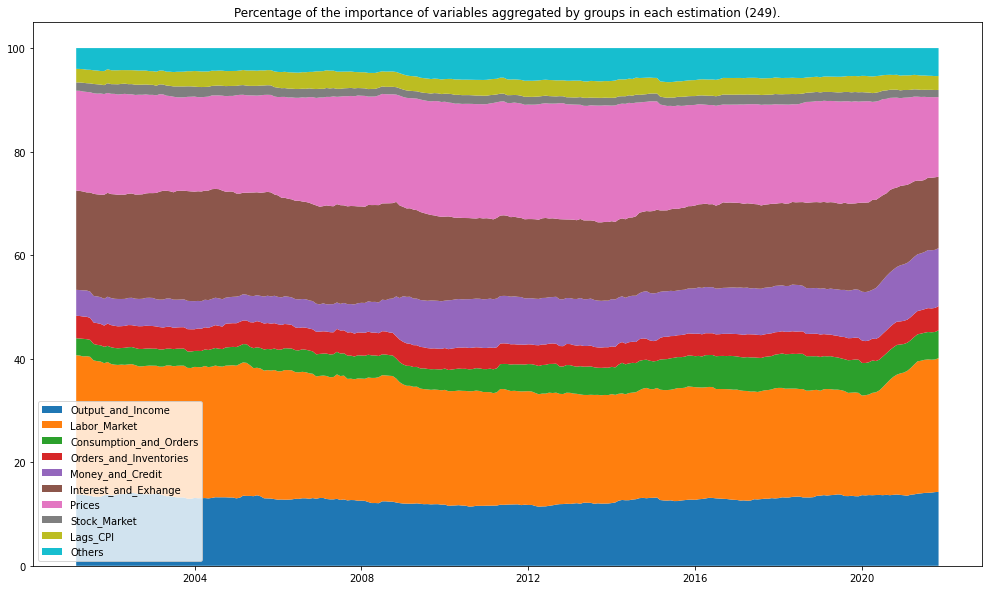

In [ ]:
# Create figure
        
fig = plt.figure() 

# Figure size

fig.set_size_inches(17, 10)

plt.stackplot(groups_importances_date.index,groups_importances_date["Output_and_Income"], groups_importances_date["Labor_Market"], groups_importances_date["Consumption_and_Orders"],
              groups_importances_date["Orders_and_Inventories"], groups_importances_date["Money_and_Credit"], groups_importances_date["Interest_and_Exhange"], groups_importances["Prices"],
              groups_importances_date["Stock_Market"], groups_importances_date["Lags_CPI"], groups_importances_date["Others"], labels = groups_importances.columns)

plt.title('Percentage of the importance of variables aggregated by groups in each estimation (249).')
plt.legend(loc= "lower left")

It is worth noting how the Labor Market group showed a higher percentage importance after the pandemic period, which may indicate a great influence of demand on inflation during this period.